In [ ]:
# 1️⃣ Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show, output_notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
output_notebook()


In [ ]:
# 2️⃣ DATASET LOADING
import zipfile, os, pandas as pd

# Unzip the uploaded file
with zipfile.ZipFile("/content/archive (4).zip", "r") as zip_ref:
    zip_ref.extractall("/content")

#  Check extracted files
print("Extracted files:", os.listdir("/content"))

#  Load the main dataset
df = pd.read_csv("/content/city_day.csv")

#  Preview first few rows
df.head()

Extracted files: ['.config', 'archive (4).zip', 'city_hour.csv', 'station_hour.csv', 'city_day.csv', 'station_day.csv', 'stations.csv', 'sample_data']


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# 3️⃣ EXPLORATORY DATA ANALYSIS (EDA)
# Basic info about dataset
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()

# Display column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
# 4️⃣ CONVERT CATEGORICAL DATA TO NUMERICAL DATA
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Example: convert city names to numeric codes
df['City'] = le.fit_transform(df['City'])


In [ ]:
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,0,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,0,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,0,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,0,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


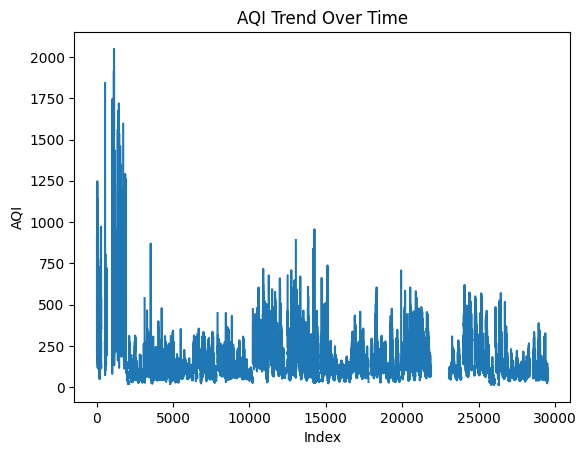

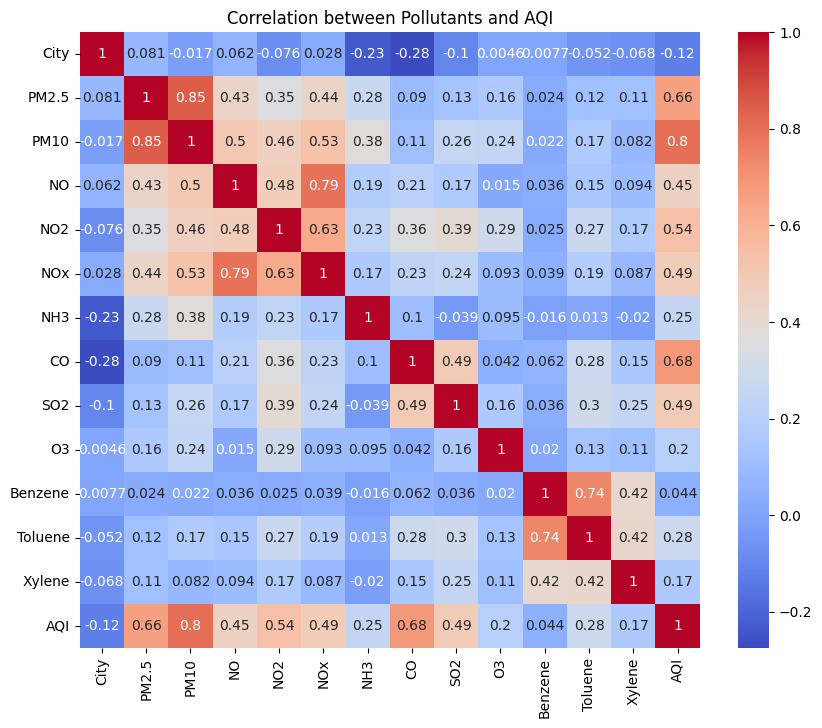

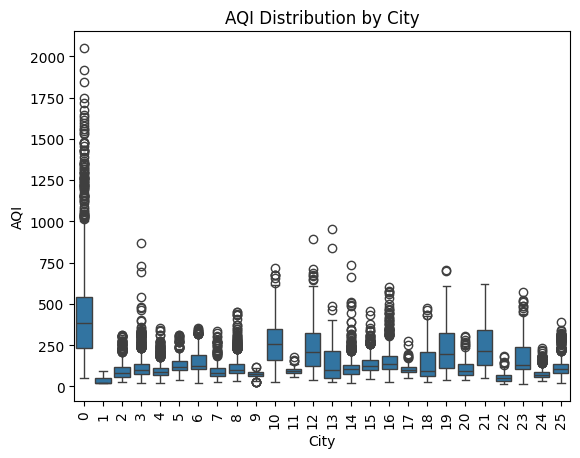

In [ ]:
# 5️⃣ DATA VISUALIZATION
# 1. AQI trend
plt.plot(df['AQI'])
plt.title('AQI Trend Over Time')
plt.xlabel('Index')
plt.ylabel('AQI')
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation between Pollutants and AQI')
plt.show()

# 3. Seaborn boxplot
sns.boxplot(x='City', y='AQI', data=df)
plt.xticks(rotation=90)
plt.title('AQI Distribution by City')
plt.show()


In [ ]:
# 6️⃣ SPLITTING THE DATA INTO TRAIN AND TEST DATA USING SKLEARN
X = df.drop(columns=['AQI'])
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


Training data: (23624, 15)
Testing data: (5907, 15)


In [ ]:
# 7️⃣ CHOOSING THE RIGHT ALGORITHM

# Since this project is about predicting continuous AQI values,
# it is a regression and time-series forecasting problem.

# Suitable algorithms include:

# 1. Linear Regression – for simple numeric prediction
# 2. Random Forest Regressor – for accurate and non-linear relationships
# 3. ARIMA or Prophet – for time-series forecasting using historical data
# 4. LSTM – for deep learning sequence prediction

# For this AirAware project, ARIMA or Prophet are best suited
# because they can forecast AQI based on past air quality trends.